## Notebook to test TherAPPy

In [1]:
from importlib import reload
import itertools
import numpy as np
import matplotlib.pyplot as pl
import matplotlib.colors
import astropy.units as u

import lib.therappy_lib as trp

## Set up thermochron object

In [3]:
reload(trp)
mygrain = trp.thermochron_object("AHe")

## Set up a temperature history

Note that for now the unit for time used in TherAPPy is years, and the unit for temperature is degrees C

In [4]:
time = np.arange(0, 100, 1.0) * 1e6 * u.year
temperature =  np.linspace(300, 10, 100)  * u.deg_C
tT = {"time": time, "temperature": temperature}

print(f"Temperature history:\n{tT}")

Temperature history:
{'time': <Quantity [       0.,  1000000.,  2000000.,  3000000.,  4000000.,
            5000000.,  6000000.,  7000000.,  8000000.,  9000000.,
           10000000., 11000000., 12000000., 13000000., 14000000.,
           15000000., 16000000., 17000000., 18000000., 19000000.,
           20000000., 21000000., 22000000., 23000000., 24000000.,
           25000000., 26000000., 27000000., 28000000., 29000000.,
           30000000., 31000000., 32000000., 33000000., 34000000.,
           35000000., 36000000., 37000000., 38000000., 39000000.,
           40000000., 41000000., 42000000., 43000000., 44000000.,
           45000000., 46000000., 47000000., 48000000., 49000000.,
           50000000., 51000000., 52000000., 53000000., 54000000.,
           55000000., 56000000., 57000000., 58000000., 59000000.,
           60000000., 61000000., 62000000., 63000000., 64000000.,
           65000000., 66000000., 67000000., 68000000., 69000000.,
           70000000., 71000000., 72000000., 73

## Model AHe closure ages

In [5]:
systems = ["AHe", "AFT", "ZHe", "ZFT"]
ages = []

# go through the thermochron systems
for tc_system in systems:
    
    # set the thermochron system
    mygrain.system = tc_system
    
    # model the thermochron age
    mygrain.model_thermochron(tT, model="Dodson")
    
    # store the ages
    ages.append(mygrain.modelled_thermochron_age)
    
    print(f"modelled thermochron age for the system {mygrain.system} using the {mygrain.model} model:\n"
          f"{mygrain.modelled_thermochron_age:0.2e}")

modelled thermochron age for the system AHe using the Dodson model:
8.94e+07 yr
modelled thermochron age for the system AFT using the Dodson model:
7.47e+07 yr
modelled thermochron age for the system ZHe using the Dodson model:
5.40e+07 yr
modelled thermochron age for the system ZFT using the Dodson model:
4.12e+07 yr


/Users/elco/mambaforge/envs/py311/lib/python3.11/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


## Model AFT using the Ketcham (2007) model

In [9]:
thermochron_parameters = {"kinetic_parameter": "Clwt", "Clwt": 0.0}
mygrain.system = "AFT"
mygrain.model_thermochron(tT, model="Ketcham2007", thermochron_parameters=thermochron_parameters)
modelled_AFT_age = tT["time"].value.max() / 1e6 - mygrain.model_results["AFT_age"]

## Show T history and modelled ages in a figure

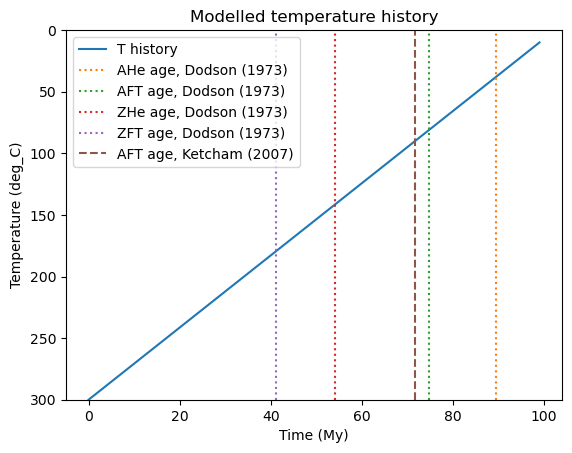

In [11]:
colors = list(matplotlib.colors.TABLEAU_COLORS)

fig, ax = pl.subplots(1, 1)
ax.plot(tT["time"].value / 1e6, tT["temperature"], label="T history")
ax.set_ylim(tT["temperature"].value.max(), 0)
ax.set_xlabel("Time (My)")
Tu = tT["temperature"].unit
ax.set_ylabel(f"Temperature ({Tu})")
ax.set_title("Modelled temperature history")

for i, system, age in zip(itertools.count(), systems, ages):
    ax.axvline(age.value / 1e6, c=colors[i+1], ls=":", lw=1.5, label=f"{system} age, Dodson (1973)")

ax.axvline(modelled_AFT_age, c=colors[i+2], ls="--", lw=1.5, label="AFT age, Ketcham (2007)")
    
ax.legend()